In [4]:
from psrqpy import QueryATNF
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager as font_manager

In [9]:
# Suppresses the font warnings
# Choose a font family that is available on your system
font_path = '/path/to/your/font.ttf'  # Replace '/path/to/your/font.ttf' with the path to your font file

# Set the font family
plt.rcParams['font.family'] = 'sans-serif'  # Default font family
plt.rcParams['font.sans-serif'] = ['Arial']  # Specify the font you want to use, e.g., Arial

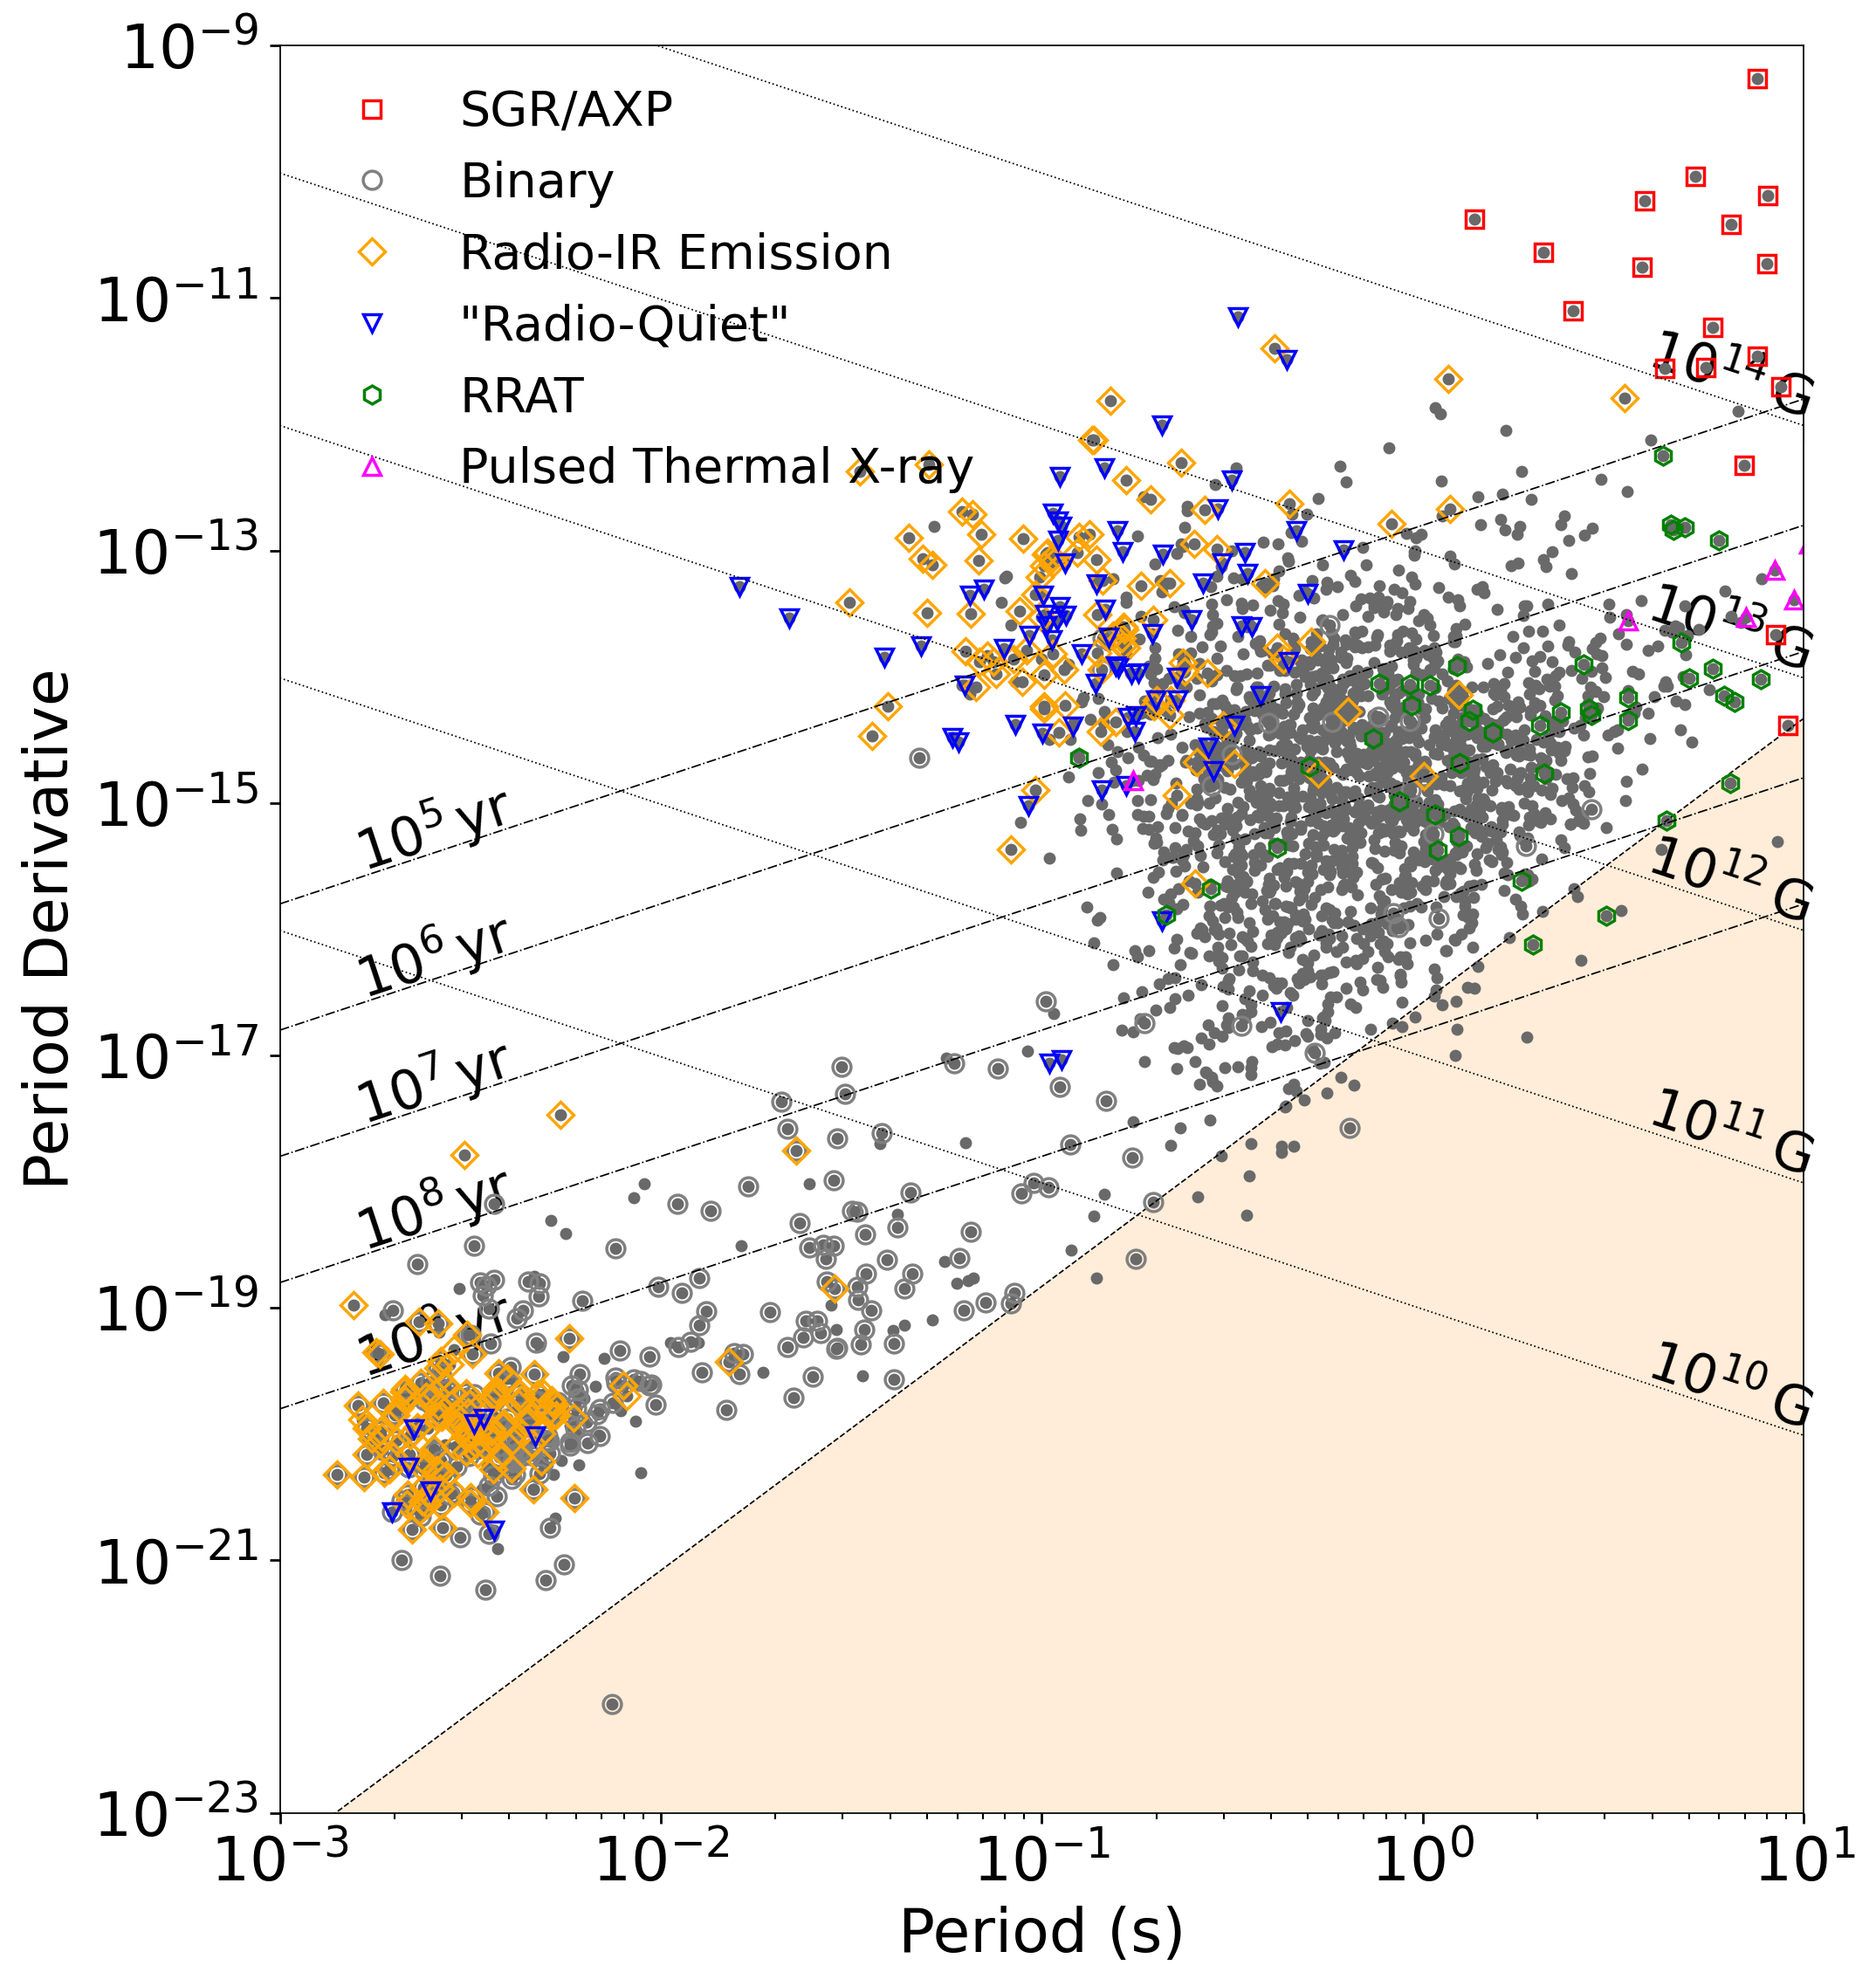

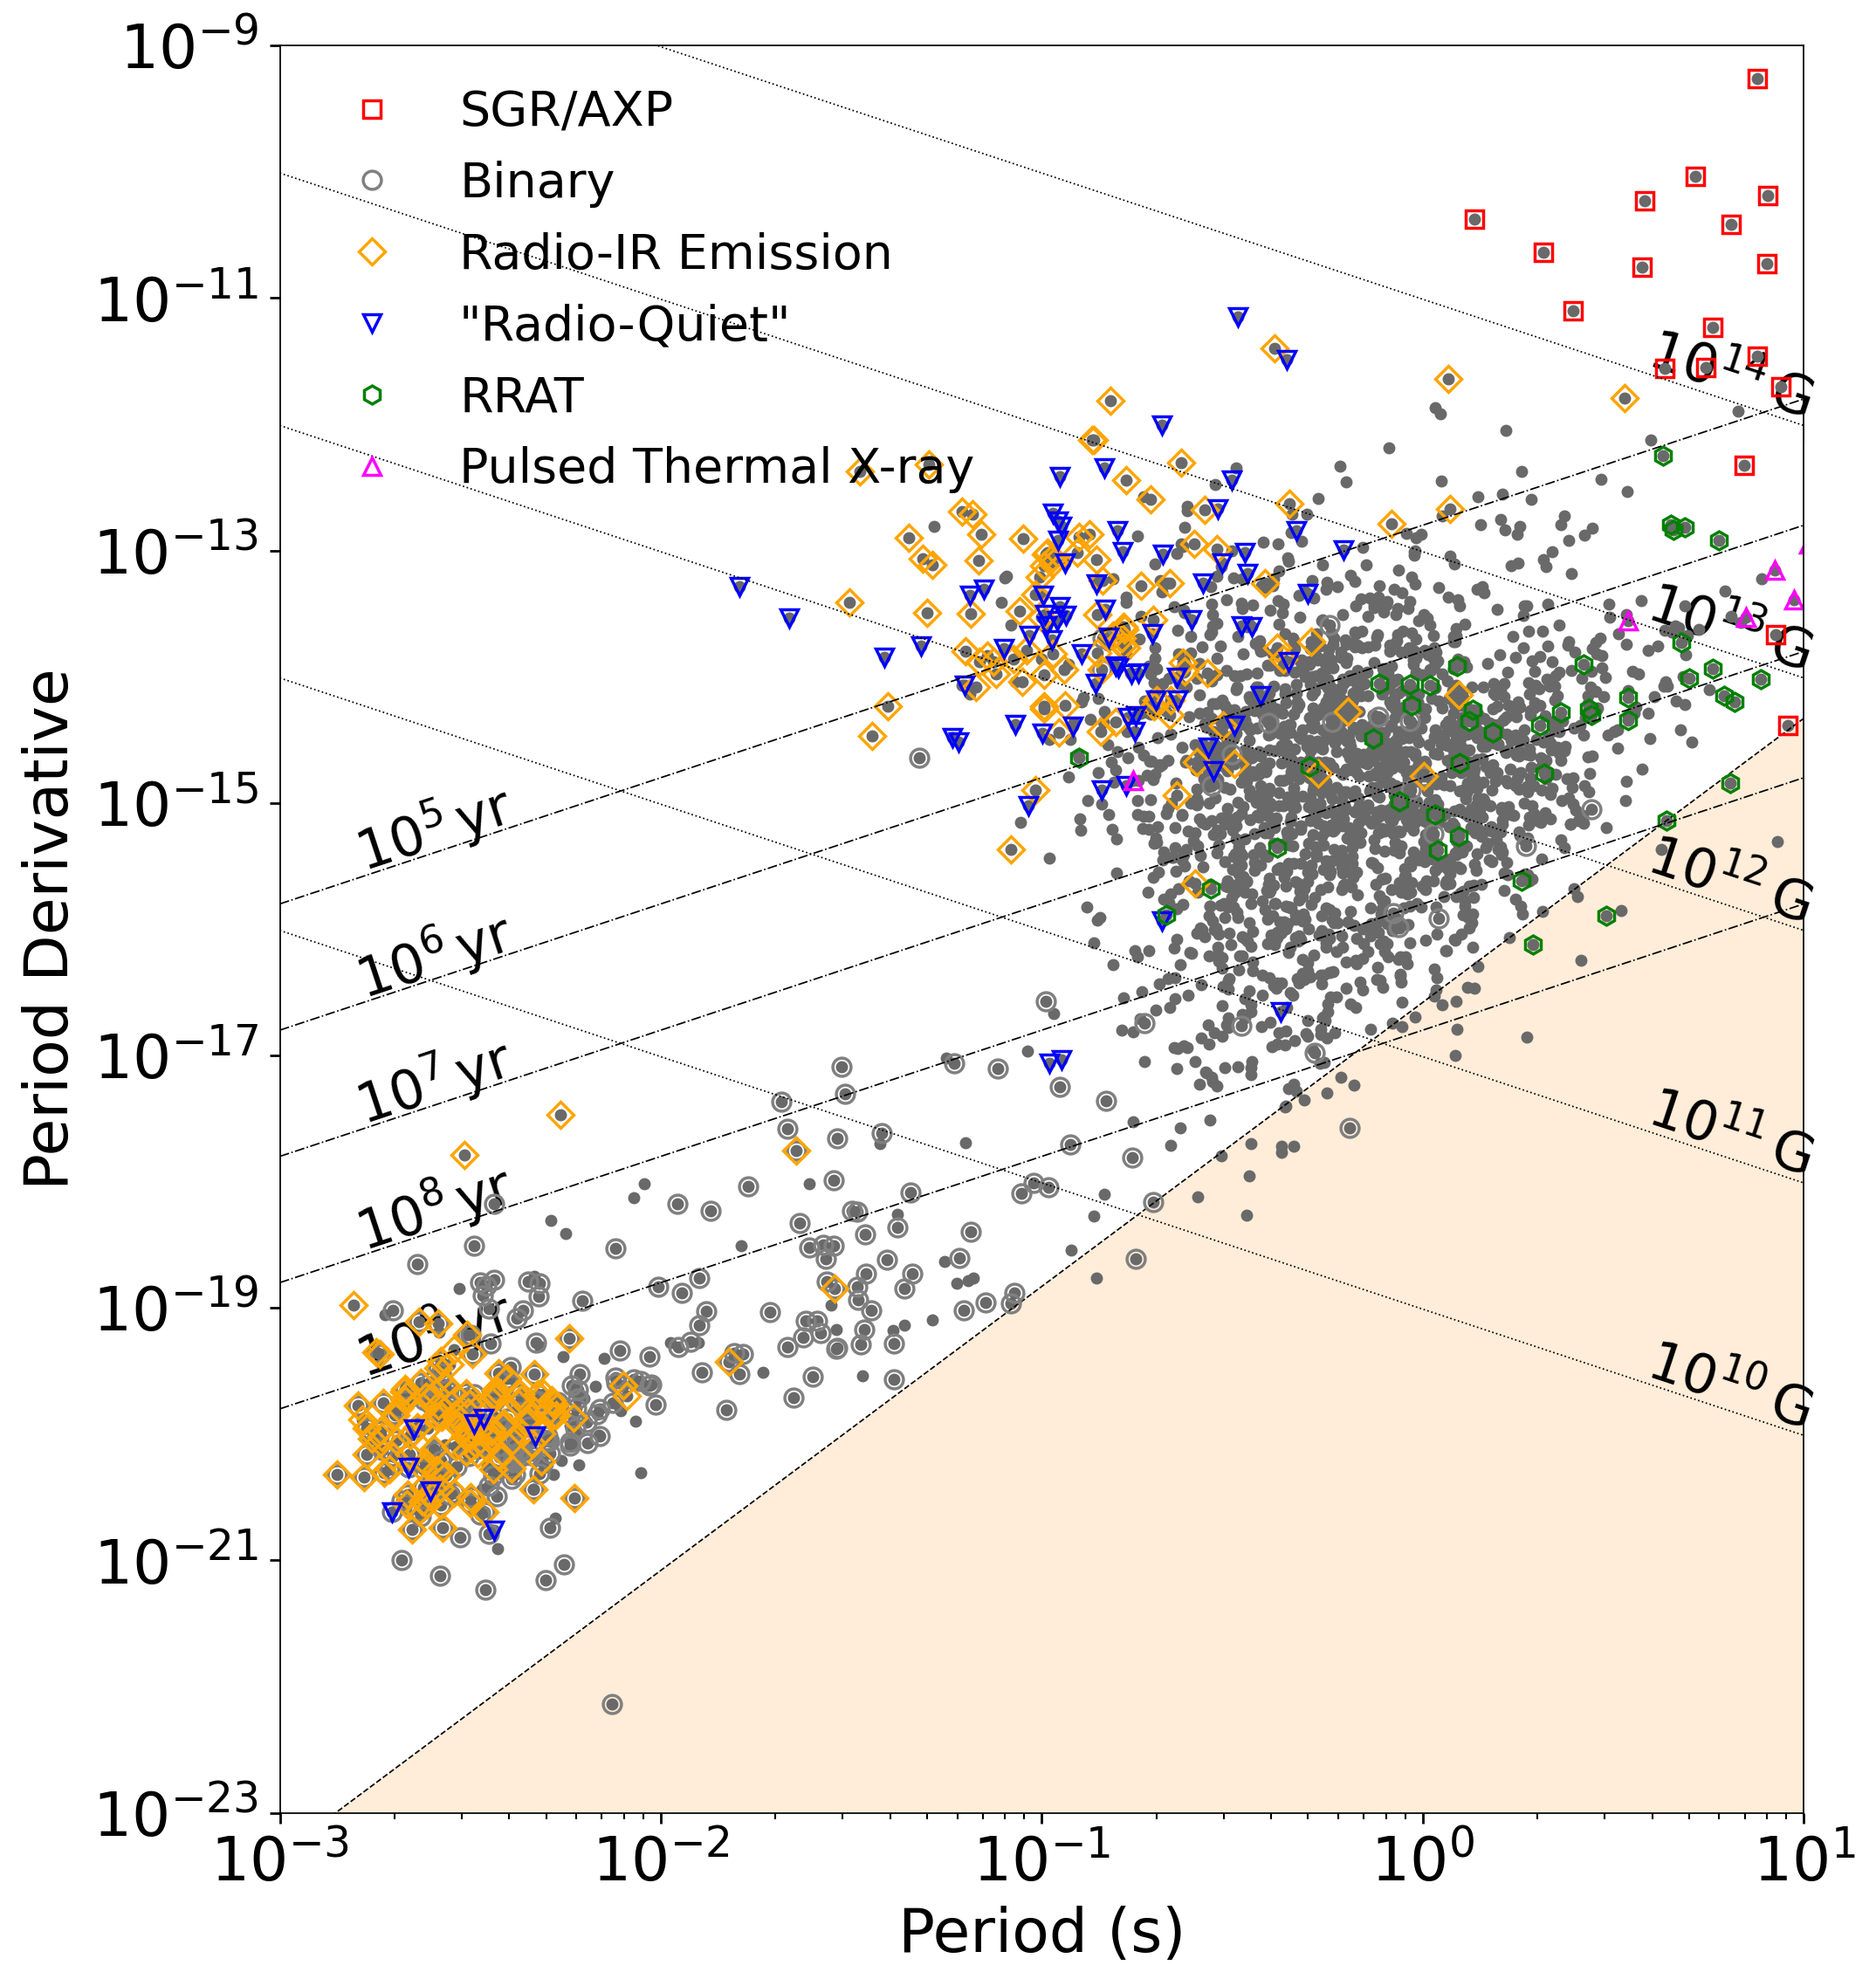

In [6]:
query = QueryATNF(params=['P0', 'P1', 'ASSOC', 'BINARY', 'TYPE', 'P1_I'])
query.ppdot(showSNRs=False, showtypes='all')

In [16]:
query = QueryATNF(params=['P0', 'P1', 'PSRJ', 'ASSOC', 'BINARY', 'TYPE', 'P1_I'])  # Parameters: Period (P0), Period derivative (P1), Pulsar name (PSRJ)
results = query.table  # Get the results as a pandas DataFrame

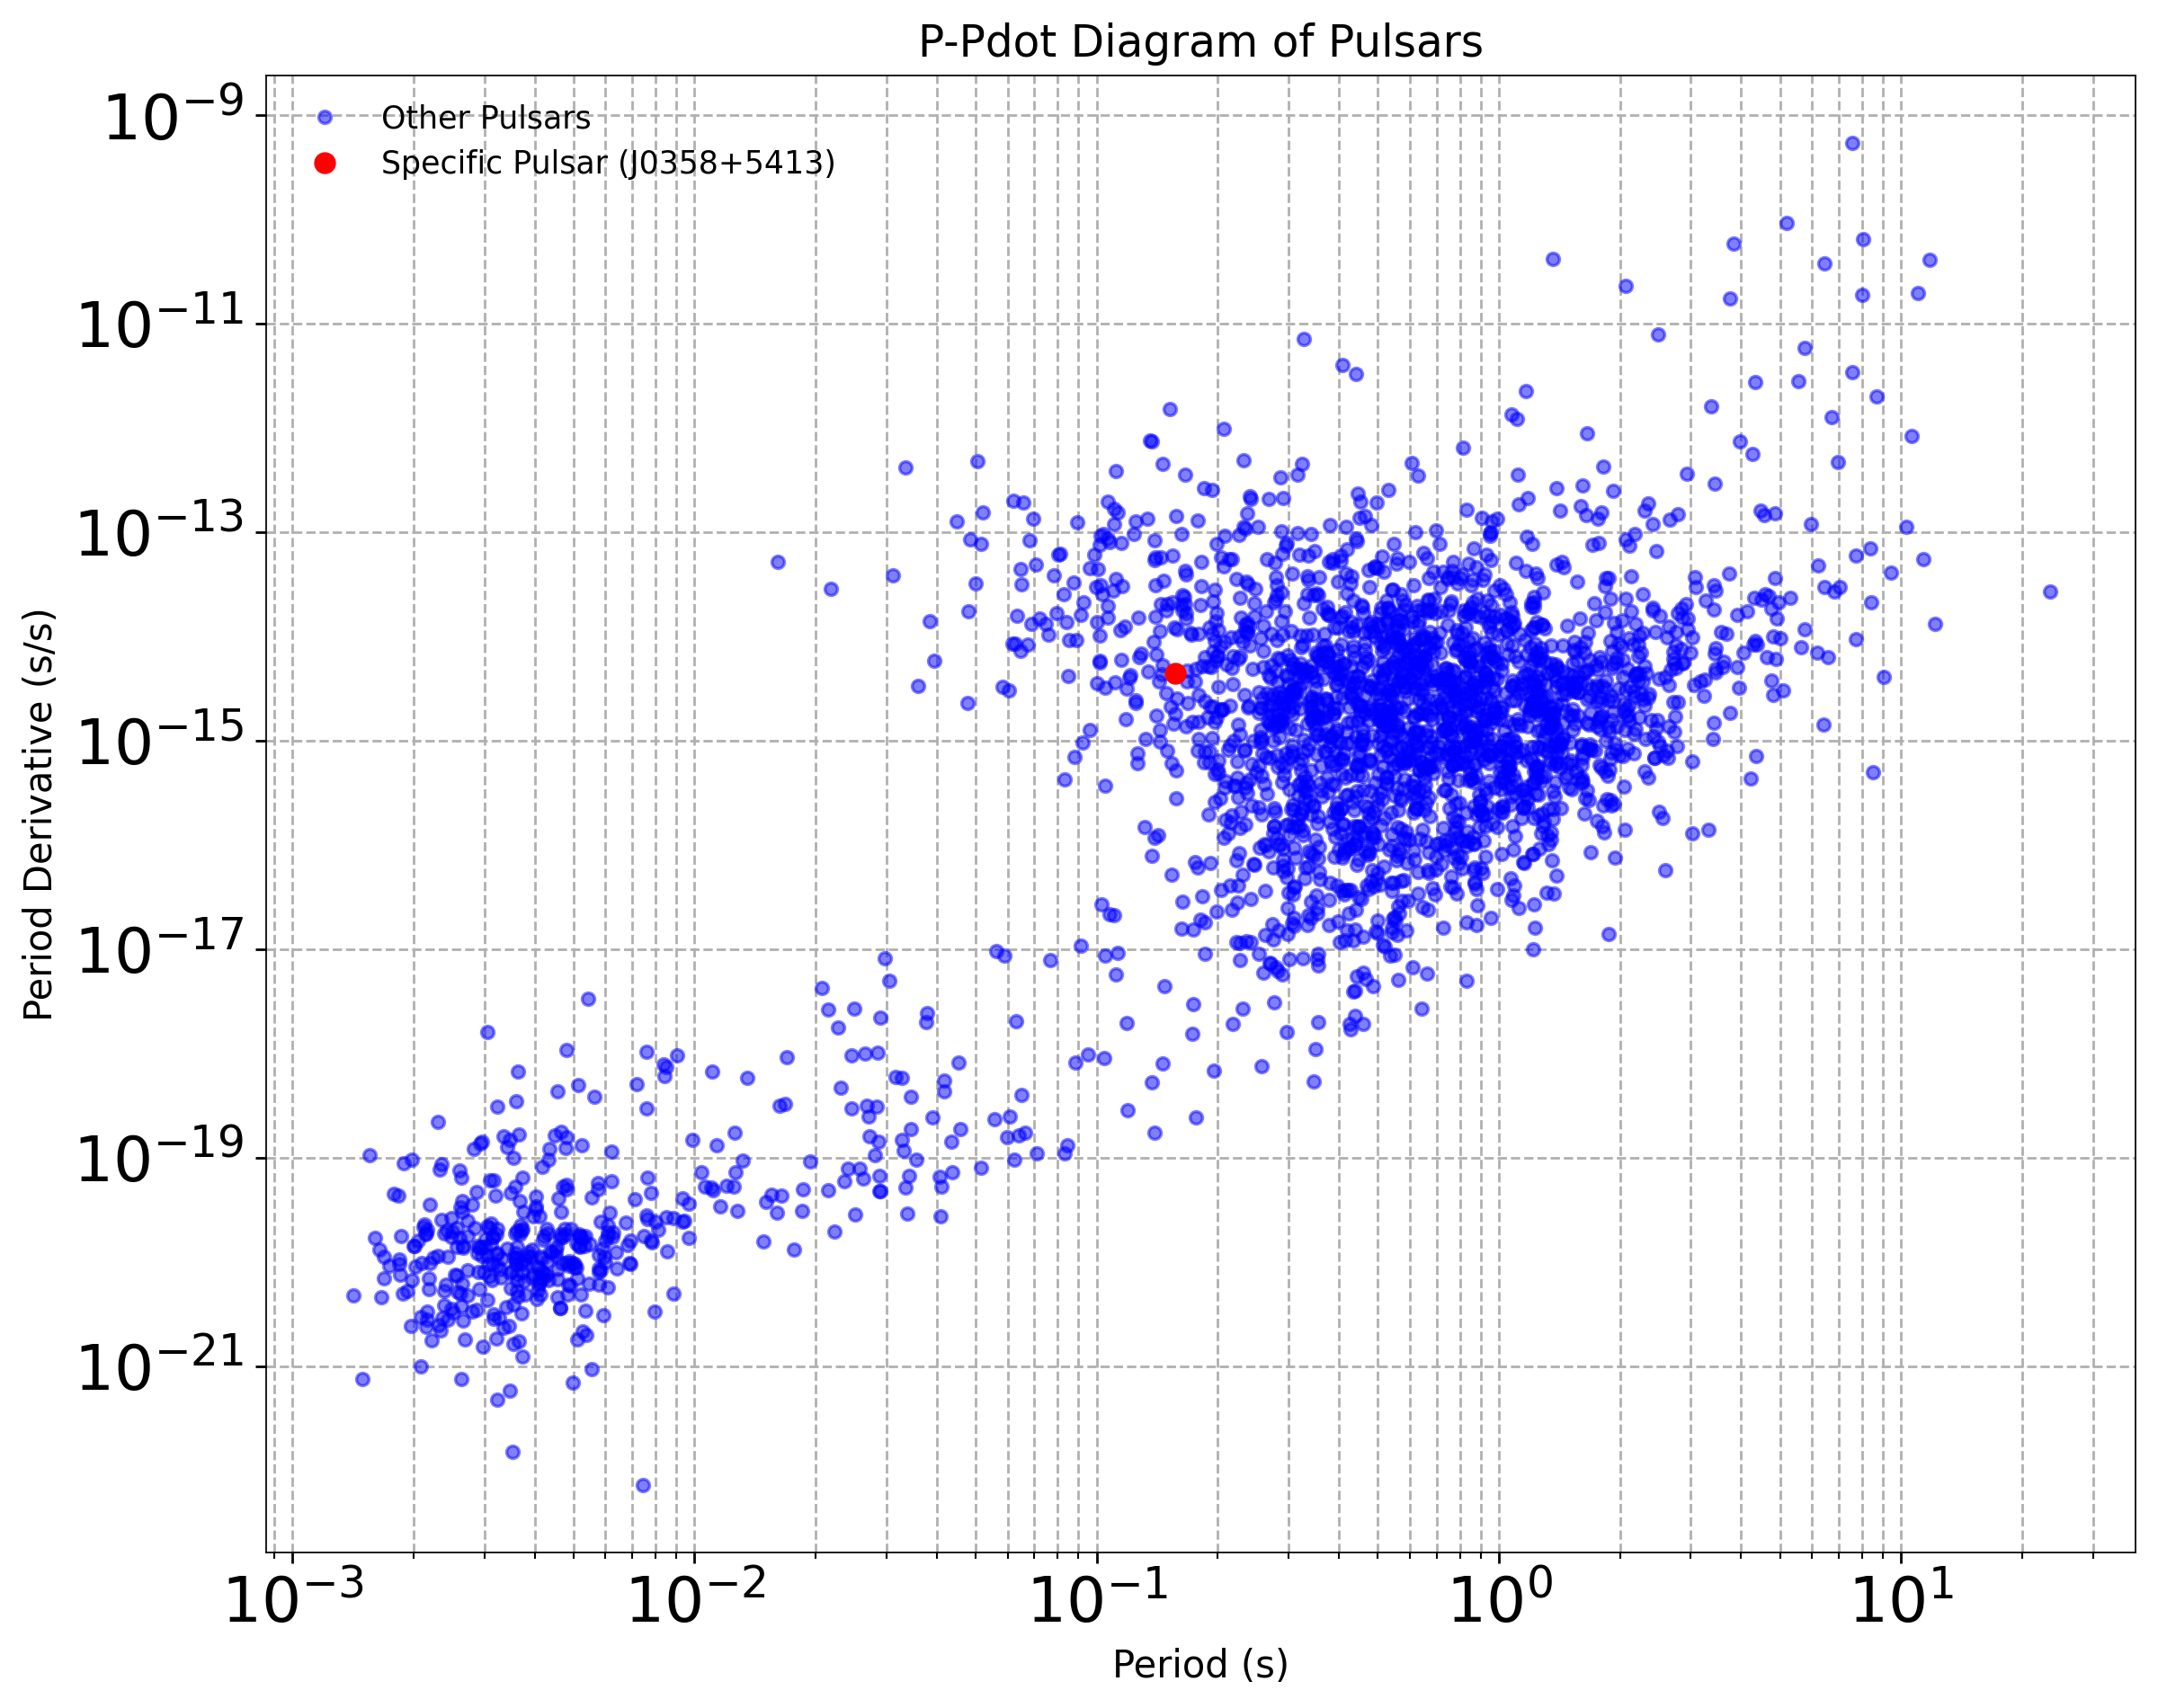

In [45]:
plt.figure(figsize=(10, 8))  # Increase plot size
plt.loglog(results['P0'], abs(results['P1']), 'o', markersize=4, label='Other Pulsars', color='blue', alpha=0.5)  # Use different color and transparency
plt.loglog(specific_data['P0'], abs(specific_data['P1']), 'o', markersize=6, label='Specific Pulsar (J0358+5413)', color='red')  # Highlight specific pulsar with larger markers

plt.xlabel('Period (s)', fontsize=12)  # Increase font size
plt.ylabel('Period Derivative (s/s)', fontsize=12)
plt.title('P-Pdot Diagram of Pulsars', fontsize=14)
plt.grid(True, which="both", linestyle='--')  # Use dashed gridlines
plt.legend(loc='upper left', fontsize=10)  # Adjust legend position and font size
plt.tight_layout()  # Adjust layout to prevent overlapping elements
plt.savefig('ppdot_plot.png', dpi=300)  # Save the plot as an image file

plt.show()

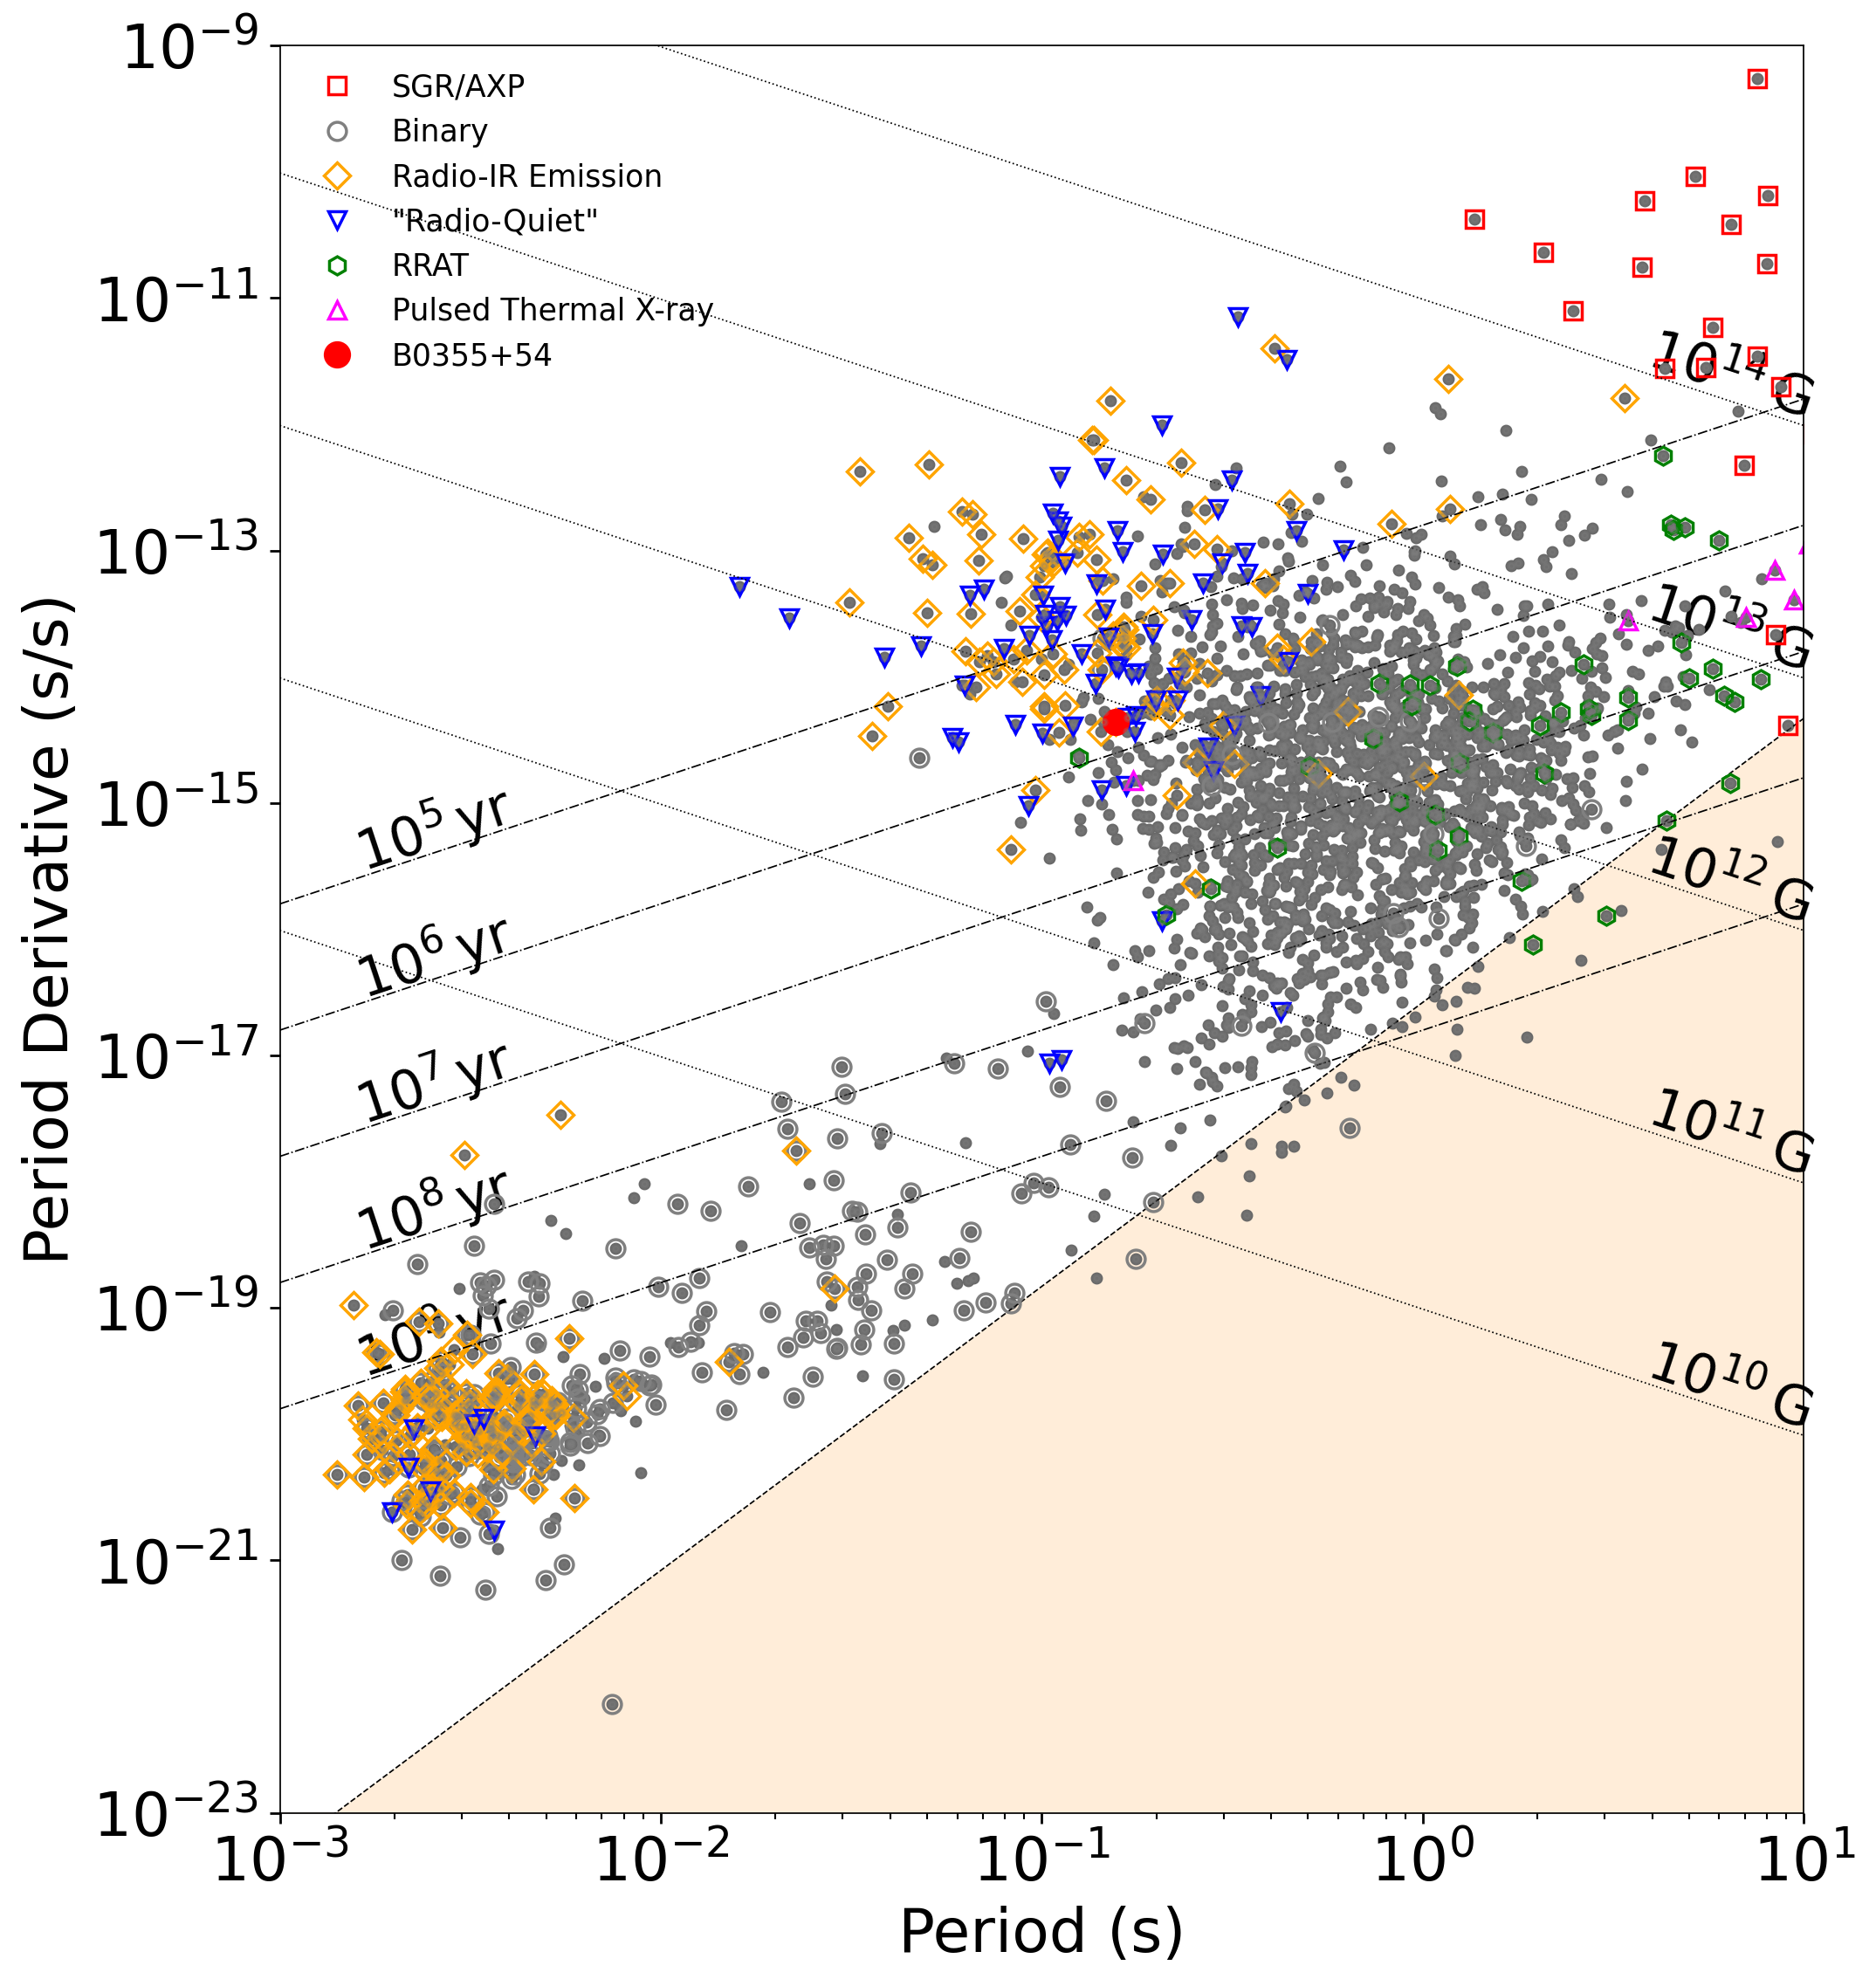

In [96]:
# Step 1: Fetch data for pulsars
query = QueryATNF(params=["P0", "P1", "NAME"])
fig = query.ppdot(showSNRs=False, showtypes='all')

# Step 2: Extract pulsar data
pulsars = query.table

# Step 3: Plot the P-Pdot diagram without displaying
ax = fig.gca()
for pulsar in pulsars:
    if pulsar['NAME'] == specific_pulsar:
        ax.plot(pulsar['P0'], pulsar['P1'], 'ro', label=specific_pulsar, markersize=8)
    else:
        ax.plot(pulsar['P0'], pulsar['P1'], 'o', color='gray', alpha=0.3, markersize=2)

# Step 4: Set axis labels and legend
ax.set_xlabel('Period (s)')
ax.set_ylabel('Period Derivative (s/s)')
ax.set_xscale('log')
ax.set_yscale('log')
ax.legend(loc='upper left', fontsize='10')

# Step 5: Display the plot
# Specify the font family
plt.rcParams['font.family'] = 'sans-serif'
plt.show()

In [67]:
print(pulsars['NAME'][163])

B0355+54


In [66]:
np.where(pulsars['NAME'] == 'B0355+54')

(array([163]),)